-0.4790498548965729


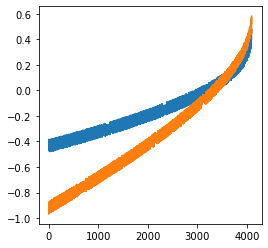

In [6]:
# Convert digital number to TBs.
# Reference : ncc.nesdis.noaa.gov/data/planck.html
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# 1. Calculate FY-4A TBs
dir = '/storage1/jhlee/NMSC_2018/FY_4A_AGRI/'
fname = dir + 'FY4A-_AGRI--_N_DISK_1047E_L1-_FDI-_MULT_NOM_20200112170000_20200112171459_4000M_V0001.HDF'
f = Dataset(fname, 'r')
tb_coff = f.variables['CALIBRATION_COEF(SCALE+OFFSET)'][:]

scale_11  = tb_coff[11][0]
offset_11 = tb_coff[11][1]
lamda_11  = 10.8

scale_12  = tb_coff[12][0]
offset_12 = tb_coff[12][1]
lamda_12  = 12.0

dn = np.arange(4096) # DN is 0 to 4095


# 1.1. Convert DN to radiance
rad_11 = scale_11 * dn + offset_11
rad_12 = scale_12 * dn + offset_12



# Convert radiance to TBs
#                         c2
# T =  -------------------------------------
#      lamda * ln(c1/lamda^5 * radiance + 1) 

c1 = 1.191042E08  # W/m2-sr-um-4
c2 = 1.4387752E04 # K/um

tb_11 = c2 / ( lamda_11 * np.log( c1/(rad_11 * lamda_11 **5) + 1.) )
tb_12 = c2 / ( lamda_12 * np.log( c1/(rad_12 * lamda_12 **5) + 1.) )



# 2. Read FY-4A Calibration table
tb_11_ref = f.variables['CALChannel12'][:]
tb_12_ref = f.variables['CALChannel13'][:]



# 3. Plot TBs
fig = plt.figure(figsize=(4,4))

diff_tb_11 = tb_11 - tb_11_ref
diff_tb_12 = tb_12 - tb_12_ref


plt.plot(diff_tb_11, label = 'tb 11')
plt.plot(diff_tb_12, label = 'tb 12')


plt.show()
#plt.savefig('../plots/brightness_temperature_with_dn.png', dpi=300)